# Kapitalgutpreismodell: CAPM - Capital Asset Pricing Model

Schau dir das Video an, um eine komplette Übersicht zu bekommen.

Portfolio Rendite:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Marktgewichte:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM eines Portfolios


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Modelliere CAPM als einfache lineare Regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [4]:
import pandas as pd

Umgehen einer Fehlermeldung da sich die Methode **is_list_like** verschoben hat. Das sollte ab **pandas_datareader** Version 0.7 wieder ohne den Fix funktionieren:

In [5]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [6]:
import pandas_datareader as web

In [7]:
spy_etf = web.DataReader('SPY','iex','2013-08-01','2018-08-01')

5y


In [8]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 2013-08-15 to 2018-08-01
Data columns (total 5 columns):
open      1250 non-null float64
high      1250 non-null float64
low       1250 non-null float64
close     1250 non-null float64
volume    1250 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.6+ KB


In [9]:
spy_etf.head()

open      high       low     close     volume
date                                                         
2013-08-15  151.6305  151.6487  150.4350  150.6976  152647543
2013-08-16  150.4078  150.9241  149.9006  150.1995  130636116
2013-08-19  150.0274  150.5437  149.2303  149.2394   96330805
2013-08-20  149.4839  150.5346  149.3209  149.9730   89235551
2013-08-21  149.5564  150.3806  148.7141  149.0492  159343176

In [10]:
start = pd.to_datetime('2013-08-01')
end = pd.to_datetime('2018-08-01')

In [11]:
aapl = web.DataReader('AAPL','iex',start,end)

5y


In [12]:
aapl.head()

open     high      low    close     volume
date                                                     
2013-08-15  64.9338  65.7159  63.9741  65.1287  122441893
2013-08-16  65.4217  65.7866  65.2530  65.7068   90461889
2013-08-19  65.9698  67.1993  65.9253  66.4145  127478547
2013-08-20  66.6722  66.7847  65.5093  65.5420   89531771
2013-08-21  65.8717  66.3373  65.5590  65.7108   83809726

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

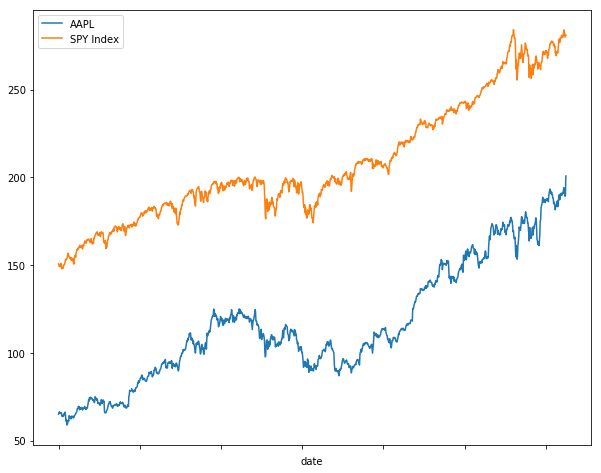

In [14]:
aapl['close'].plot(label='AAPL',figsize=(10,8))
spy_etf['close'].plot(label='SPY Index')
plt.legend()

## Vergleiche Gesamtrendite

In [15]:
aapl['Cumulative'] = aapl['close']/aapl['close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['close']/spy_etf['close'].iloc[0]

Text(0.5,1,'Cumulative Return')

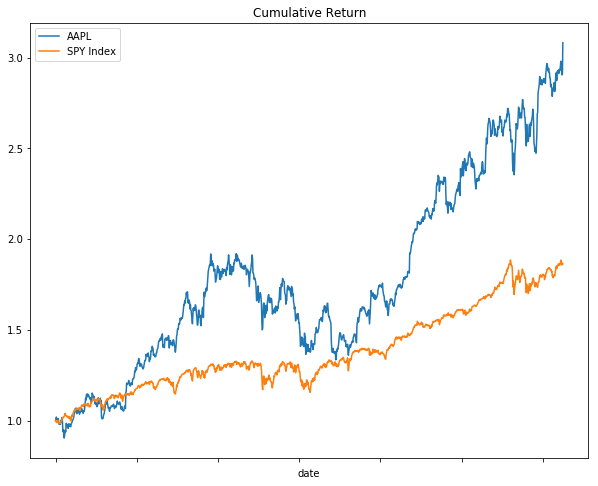

In [16]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Erfasse Tägliche Rendite

In [17]:
aapl['Daily Return'] = aapl['close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['close'].pct_change(1)

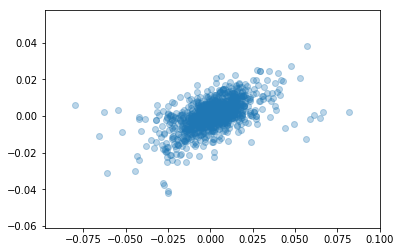

In [18]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

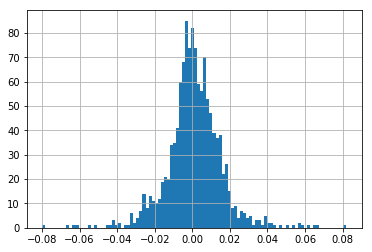

In [19]:
aapl['Daily Return'].hist(bins=100)

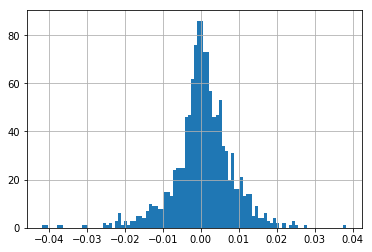

In [20]:
spy_etf['Daily Return'].hist(bins=100)

In [21]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [22]:
beta

0.2992338819821803

In [23]:
alpha

0.00022801700197582668

In [24]:
r_value

0.5542518958727578

## Was wenn unsere Aktie vollständig mit SP500 verbunden wäre?

In [25]:
spy_etf['Daily Return'].head()

date
2013-08-15         NaN
2013-08-16   -0.003305
2013-08-19   -0.006392
2013-08-20    0.004916
2013-08-21   -0.006160
Name: Daily Return, dtype: float64

In [26]:
import numpy as np

In [27]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [28]:
noise

array([ 0.00149639,  0.00054076, -0.00057999, ...,  0.00029017,
        0.00053424,  0.00033233])

In [29]:
spy_etf['Daily Return'].iloc[1:] + noise

date
2013-08-16   -0.001809
2013-08-19   -0.005851
2013-08-20    0.004336
2013-08-21   -0.006252
2013-08-22    0.010625
2013-08-23    0.004295
2013-08-26   -0.005114
2013-08-27   -0.016597
2013-08-28    0.003483
2013-08-29    0.001570
2013-08-30   -0.002297
2013-09-03    0.003770
2013-09-04    0.007423
2013-09-05    0.001538
2013-09-06    0.002181
2013-09-09    0.010577
2013-09-10    0.007432
2013-09-11    0.004231
2013-09-12   -0.004014
2013-09-13    0.003688
2013-09-16    0.007111
2013-09-17    0.004325
2013-09-18    0.011347
2013-09-19   -0.001239
2013-09-20   -0.007283
2013-09-23   -0.005883
2013-09-24   -0.002545
2013-09-25   -0.002263
2013-09-26    0.003875
2013-09-27   -0.005084
                ...   
2018-06-20    0.001860
2018-06-21   -0.006178
2018-06-22    0.001472
2018-06-25   -0.013789
2018-06-26    0.002320
2018-06-27   -0.007111
2018-06-28    0.003871
2018-06-29    0.001017
2018-07-02    0.003258
2018-07-03   -0.003123
2018-07-05    0.007368
2018-07-06    0.009006
2018-0

In [30]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [31]:
beta

0.9907593433116295

In [32]:
alpha

-8.702294675018082e-06

## Sieht aus, als wäre unser Verständnis korrekt!